# Dimensionality Reduction
One of the major challenges in building successful applied machine learning solutions: the curse of dimensionality. Unsupervised learning has a great counter: *dimensionality reduction*.

## Motivation
The curse of dimensionality: in which algorithms cannot effectively and efficiently train on the data because of the sheer size of the feature space. 

Dimensionality reduction algorithms projet high-dimensional dat to a low-dimensional space, retaining as much of the salient infromation as possible while removing redundant information. 

Essentially a lot of noise is reduced. 

Dimensionality reduction is commonly a part of the machine learning pipeline to help solve large-scale, computationally expensive problems involving images, video, speech, and text. 

In [4]:
# importing libraries
import numpy as np
import pandas as pd
import os, time
import pickle, gzip

import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl

from sklearn import preprocessing as pp
from scipy.stats import pearsonr
from numpy.testing import assert_array_almost_equal
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.metrics import log_loss, precision_recall_curve, average_precision_score, roc_curve, auc, roc_auc_score, confusion_matrix


# algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb

In [8]:
# Loading our dataset
f = gzip.open('./datasets/mnist_data/mnist.pkl.gz')
train_set, validation_set, test_set, = pickle.load(f, encoding="latin1")
f.close()

In [12]:
X_train, y_train = train_set[0], train_set[1]
X_validation, y_validation = validation_set[0], validation_set[1]
X_test, y_test = test_set[0], test_set[1]

In [26]:
# What are the shapes? 
print(X_train.shape)
print(y_train.shape)
print('')
print(X_validation.shape)
print(y_validation.shape)
print('')
print(X_test.shape)
print(y_test.shape)

(50000, 784)
(50000,)

(10000, 784)
(10000,)

(10000, 784)
(10000,)


In [27]:
# Converting our datasets into pandas DataFrames for more exploration
train_index = range(0, len(X_train))
validation_index = range(len(X_train), len(X_train) + len(X_validation))
test_index = range(len(X_train) + len(X_validation), len(X_train) + len(X_validation) + len(X_test))

# Training set
X_train = pd.DataFrame(data=X_train, index=train_index)
y_train = pd.Series(data=y_train, index=train_index)

# Validation set
X_validation = pd.DataFrame(data=X_validation, index=validation_index)
y_validation = pd.Series(data=y_validation, index=validation_index)

# Test set
X_test = pd.DataFrame(data=X_test, index=test_index)
y_test = pd.Series(data=y_test, index=test_index)

In [28]:
# Exploring our data
X_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,50000.0,...,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.0,50000.0,50000.0,50000.0
mean,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000739,0.000354,0.000204,0.000090,0.000071,0.000009,0.0,0.0,0.0,0.0
std,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.022778,0.015422,0.012079,0.007217,0.007181,0.001483,0.0,0.0,0.0,0.0
min,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.992188,0.992188,0.988281,0.988281,0.992188,0.242188,0.0,0.0,0.0,0.0


In [29]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 784 entries, 0 to 783
dtypes: float32(784)
memory usage: 149.5 MB


In [30]:
# labels
y_train.head()

0    5
1    0
2    4
3    1
4    9
dtype: int64

In [41]:
def view_digit(example):
    label = y_train.loc[0]
    image = X_train.loc[example,:].values.reshape([28,28])
    plt.title('Example: %d  Label: %d' % (example, label))
    plt.imshow(image, cmap=plt.get_cmap('gray'))
    plt.show()

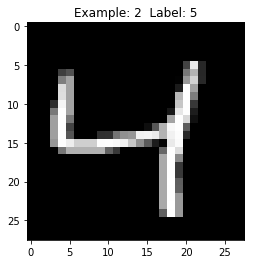

In [42]:
view_digit(2)

## Linear Projection vs. Manifold Learning
One major branch of dimensionality reduction is known as *linear projection*, which involves linearly projecting data from a high-dimensional space to a low-dimensional space. 

This includes techniques such as: **principal component analysis**, **singular value decomposition**, and **random projection**. 

The second is known as *manifold learning*, which is also referred to as *non-linear dimensionality reduction*. This involves techniques such as **isomap**, which learns the **curved distance** (also called the *geodesic distance*) between points rather than the *Eucilidean distance*. 

Other techniques include *multidimensional scaling, locally linear embedding, t-distributed stochastic neighbor embedding, dictionary learning, random trees embedding* and *independent component analsis*

# Principle Component Analysis
The algorithm finds a low-dimensional representation of the data while retaining as much of the variation as possible. 

PCA does this by addressing the correlation among features. If the correlation is very high among a subset of the features, PCA will attempt to combine the highly correlated features and represent this data with a smaller number of linearly uncorrelated features. 

The algorithm keeps performing this correlation reduction, finding the directions of maximum variance in the original high-dimensional data and projecting them onto a smaller dimensional space. 

These newly derived components are known as *principle components* 

With these components, it is possible to reconstruct the original features - not exactly but close enough. 

The new dimensions (feature sets) are called principle components. 

The number of meaningful principal components we are left with is considerably smaller than the number of dimensions in the original dataset. 

We do lose some of the variance (information) by moving to this low-dimensional space, but the underlying structure of the data is easier to identify, allowing us to perform tasks like anomaly detection and clustering more effectively and efficiently. 

**Note:** *It is essential to perform feature scaling before running PCA. PCA is very sensitive to the relative ranges of the original features. Generally we must scale the dat to make sure the features are in the same relative range.*

In [43]:
from sklearn.decomposition import PCA

In [44]:
# Setting hyper parameters
n_components = 784 # number of features (28x28)
whiten = False
random_state = 2018

pca = PCA(n_components=n_components, whiten=whiten, random_state=random_state)

We will set the number of principle components to the original number of dimensions. Then, PCA will capture the salient information from the original dimensions and start generating principal components. 

Once these components are generated, we will determine how many principal components we need to effectively capature most of the variance/information from the original feature set

In [45]:
# Let's generate these PCAs
X_train_PCA = pca.fit_transform(X_train)

# lets convert to a pandas DF
X_train_PCA = pd.DataFrame(data=X_train_PCA, index=train_index)

Given our number of components here are the same dimensionality of the data, we have not reduced the dimensionality of our data but have transformed our data. The variance/information of the original data captured by the 784 principal components should be 100%

In [48]:
# is it close to 100%?
sum(pca.explained_variance_ratio_)

0.9999999999999994

In [55]:
# Calculating the percentage of variance captured by X principal components
importance_of_principal_components = pd.Series(data=pca.explained_variance_ratio_)

In [56]:
importance_of_principal_components.head()

0    0.097444
1    0.070598
2    0.062161
3    0.053795
4    0.048581
dtype: float64

Let's now figure out exactly how many Principal components (aggregating sum) account for ~95% of the original variance/information.

In [61]:
# First 10 components
importance_of_principal_components[:10].sum() * 100

48.876237768957395

In [62]:
# First 50
importance_of_principal_components[:50].sum() * 100

82.48608993992116

In [63]:
# First 100
importance_of_principal_components[:100].sum() * 100

91.46585717188337

In [64]:
# First 200
importance_of_principal_components[:200].sum() * 100

96.65007644617862

In [65]:
# First 400
importance_of_principal_components[:400].sum() * 100

99.58289998766634

From looking at our data, we can safely say that the first 200 principle components account for ~96% variance/information. 

With just the first 200 principal components (far fewer than the original 784 dimensions), we capture over 96% of the variance/information.

PCA allows us to reduce the dimensionality of the original data substantially while retaining most of the salient information. 

On this PCA reduced feature set, other machine learning algorithms downstream in the machine learning pipeline will have an easier time seperating the data points in space and will require fewer computational resources. 

In [72]:
# Let's visualize the seperation of points in space
def scatter_plot(xDF, yDF, algo_name):
    temp_DF = pd.DataFrame(data=xDF.loc[:, 0:1], index=xDF.index)
    temp_DF = pd.concat((temp_DF, yDF), axis=1, join="inner")
    temp_DF.columns = ['First Vector', 'Second Vector', 'Label']
    sns.lmplot(x='First Vector', y='Second Vector', hue='Label', data=temp_DF, fit_reg=False)
    ax = plt.gca()
    ax.set_title(f'Seperation of Observations using {algo_name}')

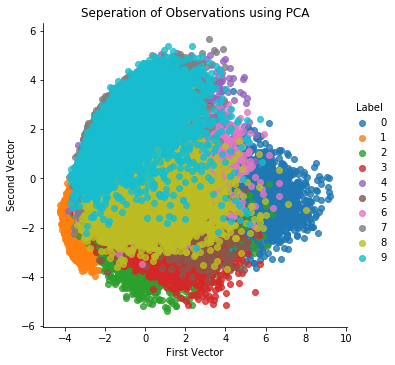

In [74]:
scatter_plot(X_train_PCA, y_train, "PCA")

What this shows is that even with just two principle components (dimensionality) we have two dimensions here (x,y), PCA does a good job of seperating the points in space such that similar points are generally closer to each other than they are to other, less similar points. 

*images of the same digit are closer to each other than they are to images of other digits* 

PCA accomplishes this without using any labels whatsoever. This demonstrates the power of unsupervised learning to capture the underlying structure of data, helping discover hidden patterns in the absence of labels. 

*Not only does PCA help seperate data so that we can discover hidden patterns more readily, it also helps reduce the size of the feature set, making it less costly - both in time and in computational resources - to train machine learning models.*

Keep in mind, given that not all information/variance is retained, there will be a slight trade-off with accuracy of the model. 

### Incremental PCA 
For datasets that are very large and cannot fit in memory, we can perform PCA incrementally in small batches, where each batch is able to fit in memory. 

Or you can use **Dask**

In [75]:
from sklearn.decomposition import IncrementalPCA

In [76]:
# Incremental PCA
n_components = 784
batch_size = None # automatically determined

incremental_PCA = IncrementalPCA(n_components=n_components, batch_size=batch_size)

X_train_incremental_PCA = incremental_PCA.fit_transform(X_train)
X_train_incremental_PCA = pd.DataFrame(data=X_train_incremental_PCA, index=train_index)

X_validation_incremental_PCA = incremental_PCA.transform(X_validation)
X_validation_incremental_PCA = pd.DataFrame(data=X_validation_incremental_PCA, index=validation_index)

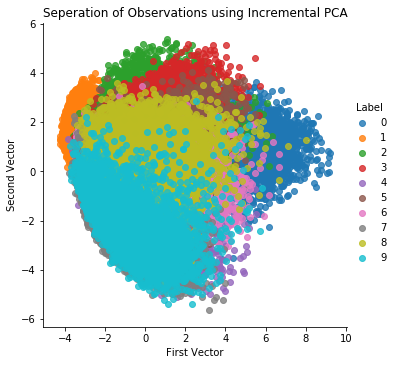

In [78]:
# Let's plot it
scatter_plot(X_train_incremental_PCA, y_train, "Incremental PCA")

### Sparse PCA
The normal PCA algorithm searches for linear combinations in all the input variables, reducing the original feature space as densely as possible. 

But for some machine learning problems, some degree of sparsity may be preferred. 

A version of PCA that retains some degree of sparsity (controlled by ```alpha```) is known as *sparse PCA*. 

This algorithm searches for linear combinations in just some of the input variables, reducing the original feature spae to some degree but not as compactly as normal PCA. 

We will reduce the trainign size for the sake of training time, do not do this on production 

In [79]:
from sklearn.decomposition import SparsePCA

In [82]:
# Sparse PCA
n_components = 100 # 100 principle components
alpha = 0.0001
random_state = 2018
n_jobs = -1

In [83]:
sparse_PCA = SparsePCA(n_components=n_components, alpha=alpha, random_state=random_state, n_jobs=n_jobs)

sparse_PCA.fit(X_train.loc[:10000,:])
X_train_sparse_PCA = sparse_PCA.transform(X_train)
X_train_sparse_PCA = pd.DataFrame(data=X_train_sparse_PCA, index=X_train.index)

X_validation_sparse_PCA = sparse_PCA.transform(X_validation)
X_validation_sparse_PCA = pd.DataFrame(data=X_validation_sparse_PCA, index=validation_index)

In [ ]:
scatter_plot(X_train_sparse_PCA, y_train, "Sparse PCA")

### Kernal PCA - NonLinear PCA
Kernal PCA maps the implicit feature space where the majority of data points lie and creates this implicit feature space in a much smaller number of dimensions than the original feature set. 

This method is especially effective when the original feature set is not linearly seperable

In [84]:
from sklearn.decomposition import KernelPCA

In [87]:
# Setting hyperparameters
n_components = 100
kernel = "rbf"
gamma = None
random_state = 2018
n_jobs = 1

In [95]:
kernel_PCA = KernelPCA(n_components=n_components, kernel=kernel, gamma=gamma, n_jobs=n_jobs, random_state=random_state)

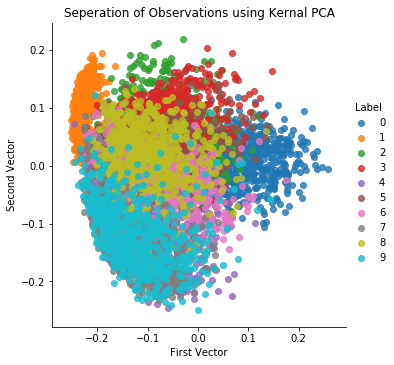

In [97]:
kernel_PCA.fit(X_train.loc[:10000,:])

X_train_kernal_PCA = kernel_PCA.transform(X_train)
X_train_kernal_PCA = pd.DataFrame(data=X_train_kernal_PCA, index=train_index)

X_validation_kernal_PCA = kernel_PCA.transform(X_validation)
X_validation_kernal_PCA = pd.DataFrame(data=X_validation_kernal_PCA, index=validation_index)

scatter_plot(X_train_kernal_PCA, y_train, "Kernal PCA")

# Singular Value Decomposition
Another approach to learning the underlying structure of the data is to reduce the rank of the original matrix of features to a smaller rank such that the original matrix can be recreated using a linear combination of some of the vectors in the smaller rank matrix. This process is known as *singular value decomposition* 

To generate the smaller rank matrix, SVD keeps the vectors of the original matrix that have the most information (higest singular value). The smaller rank matrix captures the most important elements of the original feature space. 

PCA typically uses eigen-decomposition of the covariance matrix to perform dimensionality reduction. 

SVD uses singular value decomposition. 

In [98]:
from sklearn.decomposition import TruncatedSVD

In [99]:
# Setting hypyer parameters
n_components = 200
algorithm = "randomized"
n_iter = 5
random_state = 2018

In [100]:
svd = TruncatedSVD(n_components, algorithm, n_iter, random_state)

In [101]:
X_train_svd = svd.fit_transform(X_train)
X_train_svd = pd.DataFrame(data=X_train_svd, index=train_index)

X_validation_svd = svd.transform(X_validation)
X_validation_svd = pd.DataFrame(data=X_validation_svd, index=validation_index)

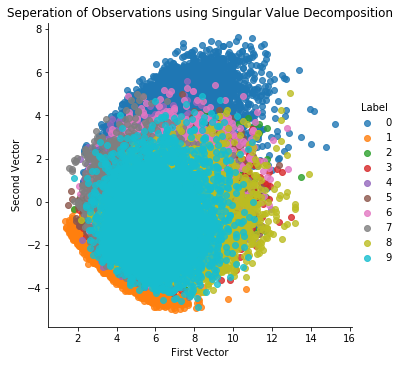

In [102]:
scatter_plot(X_train_svd, y_train, "Singular Value Decomposition")

# Random Projection
Another linear dimensionality reduction technique, which relies on the *Johnson-Lindenstrauss lemma*. Points in a high-dimensional space can be embedded into a much lower-dimensional space so that distances between the points are nearly perserved. 

In other words, even as we move from high-dimensional space to low-dimensional space, the relevant structure of the original feature set is preserved. 

## Gaussian Random Projection
We can either specify the number of components we would like to have in the reduced feature space, or we can set the hyperparameter ```eps```. The ```eps``` controls the quality of the embedding according to the johnson-lindenstrauss lemma, where smaller values generate a higher number of dimensions. 

In [103]:
from sklearn.random_projection import GaussianRandomProjection

In [104]:
# Hyper parameters
n_components = "auto"
eps = 0.5
random_state = 2018

In [105]:
GRP = GaussianRandomProjection(n_components, eps, random_state)

In [106]:
X_train_GRP = GRP.fit_transform(X_train)
X_train_GRP = pd.DataFrame(data=X_train_GRP, index=train_index)

X_validation_GRP = GRP.transform(X_validation)
X_validation_GRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

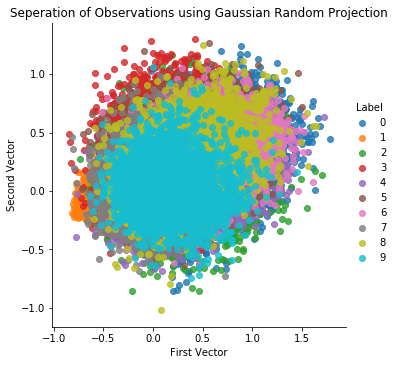

In [107]:
scatter_plot(X_train_GRP, y_train, "Gaussian Random Projection")

## Sparse Random Projection
It retains some degree of sparsity in the transformed feature set and is generally much more efficient, transforming the original data into the reduced space much faster than normal Gaussian random projeciton

In [108]:
from sklearn.random_projection import SparseRandomProjection

In [109]:
# Hyper parameters
n_components = "auto"
density = "auto"
eps = 0.5
dense_output = False
random_state = 2018

In [110]:
SRP = SparseRandomProjection(n_components, density, eps, dense_output, random_state)

In [111]:
X_train_SRP = SRP.fit_transform(X_train)
X_train_SRP = pd.DataFrame(data=X_train_SRP, index=train_index)

X_validation_SRP = SRP.transform(X_validation)
X_validation_SRP = pd.DataFrame(data=X_validation_GRP, index=validation_index)

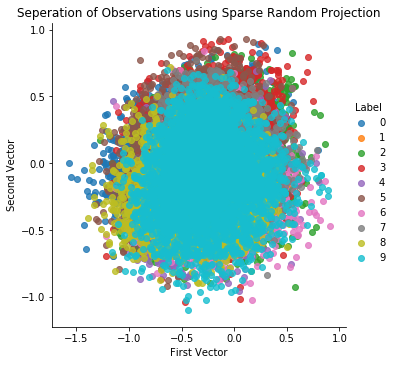

In [112]:
scatter_plot(X_train_SRP, y_train, "Sparse Random Projection")

# Isomap
Instead of linearly projecting the data from a high-dimensional space to a low-dimensional space, we can use non-linear dimensionaluty reduction methods. 

These methods are known as **manifold learning**

The most vanilla form of manifold learning is known as *isometric mapping*. Like Kernal PCA, isomap learns a new, low-dimensional embedding of the original feature set by calculating the pairwise distance of all the points, where distance is curved or geodesic distance rather than Euclidean distance. 

In other words, it learns the intrinsic geometry of the orignal data based on where each point lies relative to its neighbor on a manifold.

In [113]:
from sklearn.manifold import Isomap

In [114]:
# Hyper parameters
n_neighbors = 5
n_components = 10
n_jobs = 4

In [119]:
# Instantiating 
isomap = Isomap(n_neighbors=n_neighbors, n_components=n_components, n_jobs=n_jobs)

In [121]:
isomap.fit(X_train.loc[0:5000,:])

Isomap(eigen_solver='auto', max_iter=None, n_components=10, n_jobs=4,
       n_neighbors=5, neighbors_algorithm='auto', path_method='auto', tol=0)

In [122]:
X_train_isomap = isomap.transform(X_train)
X_train_isomap = pd.DataFrame(data=X_train_isomap, index=train_index)

X_validation_isomap = isomap.transform(X_validation)
X_validation_isomap = pd.DataFrame(data=X_validation_isomap, index=validation_index)

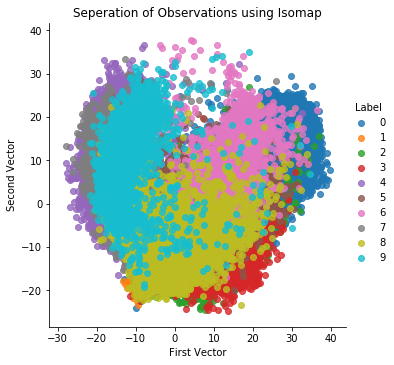

In [123]:
scatter_plot(X_train_isomap, y_train, "Isomap")

# Locally Linear Embedding
This method preserves distances within local neighborhoods as it projects data from the original feature space to a reduced space. 

LLE discovers nonlinear structure in the original, high-dimensional data by segmenting the data into smaller components (neighbor points) and modeling each component as a linear embedding. 

In [131]:
from sklearn.manifold import LocallyLinearEmbedding

In [132]:
n_neighbors = 10
n_components = 2
method = "modified"
n_jobs = 4
random_state = 2018

In [133]:
lle = LocallyLinearEmbedding(n_neighbors=n_neighbors, n_components=n_components, method=method, random_state=random_state, n_jobs=n_jobs)

In [134]:
lle.fit(X_train.loc[0:5000,:])

X_train_lle = lle.transform(X_train)
X_train_lle = pd.DataFrame(data=X_train_lle, index=train_index)

X_validation_lle = lle.transform(X_validation)
X_validation_lle = pd.DataFrame(data=X_validation_lle, index=validation_index)

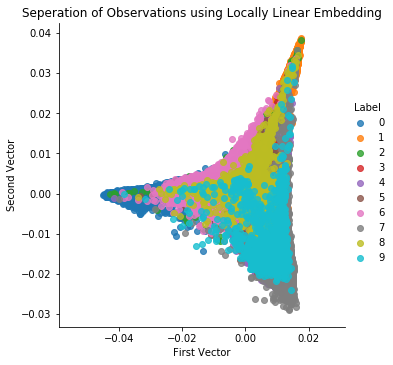

In [135]:
scatter_plot(X_train_lle, y_train, "Locally Linear Embedding")

# t-Distributed Stochastic Neighbor Embedding 
t-SNE is a nonlinear dimensionality reduction technique for visualizing high-dimensional data. 

t-SNE accomplishes this by modeling each high-dimensional point in a two or three dimensional space, where similar points are modeled close to each other and dissimilar points are modeled farther away. 

It does this by constructing two probability distributions, one over pairs of points in thelow-dimensional space such that similar points have a high probability and dissimilar points have a lower probability. 

t-SNE minimizes the *Kullback-Leibler divergence* between two probability distributions. 

In production, you will want to first use another dimensionality reduction technique before applying t-SNE. 

This will help reduce the noise in the features that are fed into t-SNE and speed up the computation of the algorithm

In [136]:
from sklearn.manifold import TSNE

In [137]:
n_components = 2
learning_rate = 300
perplexity = 30
early_exaggeration = 12
init = "random"
random_state = 2018

In [138]:
tSNE = TSNE(n_components=n_components, learning_rate=learning_rate, perplexity=perplexity, early_exaggeration=early_exaggeration, init=init, random_state=random_state)

In [139]:
X_train_tSNE = tSNE.fit_transform(X_train_PCA.loc[0:5000,:9])

In [140]:
X_train_tSNE = pd.DataFrame(data=X_train_tSNE, index=train_index[0:5001])

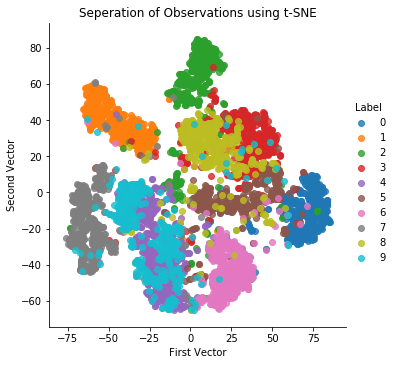

In [141]:
scatter_plot(X_train_tSNE, y_train, "t-SNE")

# Other Dimensionality Reduction Methods
The following dimensionality reduction methods do not realy on any sort of geometry or distance metric 

## Dictionary Learning
This learns the sparse representation of the original data. The resulting matrix is known as the dictionary, and the vectors in the dictionary are known as atoms. 

These atoms are simple, binary vectors, populated by 0s and 1s.

Each instance in the original data can be reconstructed as a weighted sum of these atoms.

Assuming there are *d* features in the original data and *n* atoms in the dictionary, we can have a dictionary that is either:
* **undercomplete** where $n < d$
* **overcomplete** where $n > d$

The **undercomplete** dictionary achieves dimensuonality reduction, representing the original data with a fewer number of vectors. 

In [142]:
from sklearn.decomposition import MiniBatchDictionaryLearning

In [143]:
n_components = 30 
alpha = 1
batch_size = 200
n_iter = 25
random_state = 2018

In [144]:
mini_batch_dictionary_learning = MiniBatchDictionaryLearning(n_components=n_components, alpha=alpha, batch_size=batch_size, n_iter=n_iter, random_state=random_state)

In [147]:
mini_batch_dictionary_learning.fit(X_train.loc[:,:10000])

MiniBatchDictionaryLearning(alpha=1, batch_size=200, dict_init=None,
                            fit_algorithm='lars', n_components=30, n_iter=25,
                            n_jobs=None, positive_code=False,
                            positive_dict=False, random_state=2018,
                            shuffle=True, split_sign=False,
                            transform_algorithm='omp', transform_alpha=None,
                            transform_n_nonzero_coefs=None, verbose=False)

In [148]:
X_train_mbdl = mini_batch_dictionary_learning.fit_transform(X_train)
X_train_mbdl = pd.DataFrame(data=X_train_mbdl, index=train_index)

X_validation_mbdl = mini_batch_dictionary_learning.transform(X_validation)
X_validation_mbdl = pd.DataFrame(data=X_validation_mbdl, index=validation_index)

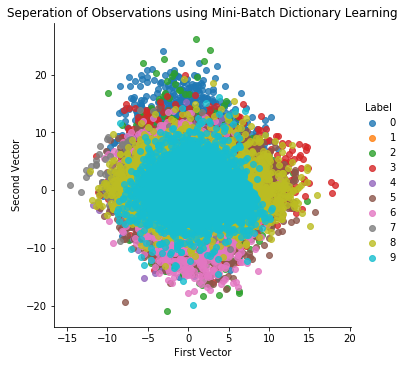

In [149]:
scatter_plot(X_train_mbdl, y_train, "Mini-Batch Dictionary Learning")

## Independent Component Analysis
One common problem with unlabeled data is that there are many independent signals embedded together into the features we are given. 

using ICA, we can seperate these blended signals into their individual components. 

After the seperation is complete, we can reconstruct any of the original features by adding together some combination of the individual components we generate. 

This is usually used in signal processing tasks (identifying the individual voice in an audio clip of busy coffeehouse) 

In [150]:
from sklearn.decomposition import FastICA

In [151]:
n_components = 25
algorithm = "parallel"
whiten = True
max_iter = 100
random_state = 2018

In [152]:
fast_ICA = FastICA(n_components=n_components, algorithm=algorithm, whiten=whiten, max_iter=max_iter, random_state=random_state)

In [153]:
X_train_fast_ICA = fast_ICA.fit_transform(X_train)
X_train_fast_ICA = pd.DataFrame(X_train_fast_ICA, index=train_index)

X_validation_fast_ICA = fast_ICA.transform(X_validation)
X_validation_fast_ICA = pd.DataFrame(data=X_validation_fast_ICA, index=validation_index)

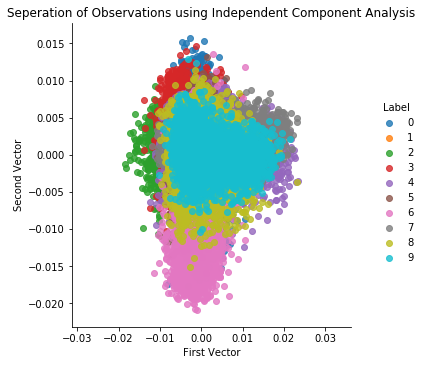

In [154]:
scatter_plot(X_train_fast_ICA, y_train, "Independent Component Analysis")

In [155]:
import gc

In [156]:
gc.collect()

3583

In [157]:
gc.collect()

0